# Proyek Analisis Data : E-Commerce Public Dataset

* Nama: Yazid Zinedine Hdiana.
* Email: zinedineyazid911@gmail.com
* Id Dicoding: zinedine_yazid_KiwO

# Menentukan Pertanyaan Bisnis

 1. Bagaimana Performa Penjualan dari Tahun 2016 s.d 2018?
 2. Produk apa yang paling banyak dibeli dan kurang diminati oleh pelanggan?
 3. Bagaimana Distribusi Pesanan yang Tercatat Berdasarkan Status Order?
 4. Bagaimana Distribusi Pelanggan Berdasarkan Jenis Pembayaran?

## Menyiapkan semua library yang dibuthkan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
customers_df = pd.read_csv("customers_dataset.csv")
customers_df

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP
...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS


In [3]:
geolocation_df = pd.read_csv("geolocation_dataset.csv")
geolocation_df

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP
...,...,...,...,...,...
1000158,99950,-28.068639,-52.010705,tapejara,RS
1000159,99900,-27.877125,-52.224882,getulio vargas,RS
1000160,99950,-28.071855,-52.014716,tapejara,RS
1000161,99980,-28.388932,-51.846871,david canabarro,RS


In [4]:
orders_items_df = pd.read_csv("order_items_dataset.csv")
orders_items_df

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72


In [5]:
orders_payments_df = pd.read_csv("order_payments_dataset.csv")
orders_payments_df

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45
...,...,...,...,...,...
103881,0406037ad97740d563a178ecc7a2075c,1,boleto,1,363.31
103882,7b905861d7c825891d6347454ea7863f,1,credit_card,2,96.80
103883,32609bbb3dd69b3c066a6860554a77bf,1,credit_card,1,47.77
103884,b8b61059626efa996a60be9bb9320e10,1,credit_card,5,369.54


In [6]:
orders_review_df = pd.read_csv("order_reviews_dataset.csv")
orders_review_df

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53
...,...,...,...,...,...,...,...
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07 00:00:00,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09 00:00:00,2017-12-11 20:06:42
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22 00:00:00,2018-03-23 09:10:43
99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,NaN,2018-07-01 00:00:00,2018-07-02 12:59:13


In [7]:
orders_df = pd.read_csv("orders_dataset.csv")
orders_df

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00


In [8]:
products_category_df = pd.read_csv("/content/product_category_name_translation.csv")
products_category_df

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor
...,...,...
66,flores,flowers
67,artes_e_artesanato,arts_and_craftmanship
68,fraldas_higiene,diapers_and_hygiene
69,fashion_roupa_infanto_juvenil,fashion_childrens_clothes


In [9]:
products_df = pd.read_csv("products_dataset.csv")
products_df

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0
...,...,...,...,...,...,...,...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao,45.0,67.0,2.0,12300.0,40.0,40.0,40.0
32947,bf4538d88321d0fd4412a93c974510e6,construcao_ferramentas_iluminacao,41.0,971.0,1.0,1700.0,16.0,19.0,16.0
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho,50.0,799.0,1.0,1400.0,27.0,7.0,27.0
32949,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0


In [10]:
sellers_df = pd.read_csv("sellers_dataset.csv")
sellers_df

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP
...,...,...,...,...
3090,98dddbc4601dd4443ca174359b237166,87111,sarandi,PR
3091,f8201cab383e484733266d1906e2fdfa,88137,palhoca,SC
3092,74871d19219c7d518d0090283e03c137,4650,sao paulo,SP
3093,e603cf3fec55f8697c9059638d6c8eb5,96080,pelotas,RS


Ada 9 Dataset yang akan digunakan pada projek akhir ini

### Assessing Data

#### Menampilkan Informasi Seluruh Dataset

In [11]:
#Melihat informasi setiap Dataset
customers_df.info()
geolocation_df.info()
orders_items_df.info()
orders_payments_df.info()
orders_review_df.info()
orders_df.info()
products_category_df.info()
products_df.info()
sellers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  

Catatan: 9 Dataset tersebut memiliki jumlah row dan column yang berbeda. Terdapat beberapa dataset yang memiliki data yang hilang.

In [12]:
# Melihat data duplikat dari tiap tiap tabel
print("Jumlah duplikasi pada tabel customer sebanyak ", customers_df.duplicated().sum())
print("Jumlah duplikasi pada tabel geolocation sebanyak ", geolocation_df.duplicated().sum())
print("Jumlah duplikasi pada tabel order items sebanyak ", orders_items_df.duplicated().sum())
print("Jumlah duplikasi pada tabel order payments sebanyak ", orders_payments_df.duplicated().sum())
print("Jumlah duplikasi pada tabel order review sebanyak ", orders_review_df.duplicated().sum())
print("Jumlah duplikasi pada tabel order sebanyak ", orders_df.duplicated().sum())
print("Jumlah duplikasi pada tabel product category sebanyak ", products_category_df.duplicated().sum())
print("Jumlah duplikasi pada tabel product sebanyak ", products_df.duplicated().sum())
print("Jumlah duplikasi pada tabel sellers sebanyak ", sellers_df.duplicated().sum())

Jumlah duplikasi pada tabel customer sebanyak  0
Jumlah duplikasi pada tabel geolocation sebanyak  261831
Jumlah duplikasi pada tabel order items sebanyak  0
Jumlah duplikasi pada tabel order payments sebanyak  0
Jumlah duplikasi pada tabel order review sebanyak  0
Jumlah duplikasi pada tabel order sebanyak  0
Jumlah duplikasi pada tabel product category sebanyak  0
Jumlah duplikasi pada tabel product sebanyak  0
Jumlah duplikasi pada tabel sellers sebanyak  0


In [13]:
# Melihat missing values dari tiap tiap tabel
print("Jumlah missing value pada tabel customer sebanyak ", customers_df.isnull().sum())
print("Jumlah missing value pada tabel geolocation sebanyak ", geolocation_df.isnull().sum())
print("Jumlah missing value pada tabel order items sebanyak ", orders_items_df.isnull().sum())
print("Jumlah missing value pada tabel order payments sebanyak ", orders_payments_df.isnull().sum())
print("Jumlah missing value pada tabel order review sebanyak ", orders_review_df.isnull().sum())
print("Jumlah missing value pada tabel order sebanyak ", orders_df.isnull().sum())
print("Jumlah missing value pada tabel product category sebanyak ", products_category_df.isnull().sum())
print("Jumlah missing value pada tabel product sebanyak ", products_df.isnull().sum())
print("Jumlah missing value pada tabel sellers sebanyak ", sellers_df.isnull().sum())

Jumlah missing value pada tabel customer sebanyak  customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64
Jumlah missing value pada tabel geolocation sebanyak  geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64
Jumlah missing value pada tabel order items sebanyak  order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64
Jumlah missing value pada tabel order payments sebanyak  order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64
Jumlah missing value pada tabel order review sebanyak  review_id                      0
order_id                

Melihat deskripsi statistik dari setiap tabel

In [14]:
customers_df.describe()

,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


In [15]:
geolocation_df.describe()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
count,1.000163e+06,1.000163e+06,1.000163e+06
mean,3.657417e+04,-2.117615e+01,-4.639054e+01
std,3.054934e+04,5.715866e+00,4.269748e+00
min,1.001000e+03,-3.660537e+01,-1.014668e+02
25%,1.107500e+04,-2.360355e+01,-4.857317e+01
50%,2.653000e+04,-2.291938e+01,-4.663788e+01
75%,6.350400e+04,-1.997962e+01,-4.376771e+01
max,9.999000e+04,4.506593e+01,1.211054e+02


In [16]:
orders_items_df.describe()

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


In [17]:
orders_payments_df.describe()

,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


In [18]:
orders_review_df.describe()

,review_score
count,99224.000000
mean,4.086421
std,1.347579
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [19]:
orders_df.describe()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


In [20]:
products_category_df.describe()

,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1


In [21]:
products_df.describe()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


In [22]:
sellers_df.describe()

,seller_zip_code_prefix
count,3095.000000
mean,32291.059451
std,32713.453830
min,1001.000000
25%,7093.500000
50%,14940.000000
75%,64552.500000
max,99730.000000


# Cleaning Data

In [23]:
# Memperbaiki tipe data
datetime_order = ["order_purchase_timestamp","order_approved_at","order_delivered_carrier_date","order_delivered_customer_date","order_estimated_delivery_date"]
for column in datetime_order:
  orders_df[column] = pd.to_datetime(orders_df[column], errors='coerce')

datetime_items = ["shipping_limit_date"]
for column in datetime_items:
  orders_items_df[column] = pd.to_datetime(orders_items_df[column], errors='coerce')

datetime_reviews = ["review_creation_date","review_answer_timestamp"]
for column in datetime_reviews:
  orders_review_df[column] = pd.to_datetime(orders_review_df[column], errors='coerce')

In [24]:
# Menghilangkan data duplikat pada tabel geo
geolocation_df.drop_duplicates(inplace=True)
print("Jumlah duplikasi pada data geolocation: ", geolocation_df.duplicated().sum())

Jumlah duplikasi pada data geolocation:  0


In [25]:
# Menghilangkan kolom review comment title pada dataset order review karena memilki banyak missing value
orders_review_df = orders_review_df.drop('review_comment_title', axis=1)
orders_review_df

,review_id,order_id,review_score,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,2018-01-18,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,2018-03-10,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,2018-02-17,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,Recebi bem antes do prazo estipulado.,2017-04-21,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,Parabéns lojas lannister adorei comprar pela I...,2018-03-01,2018-03-02 10:26:53
...,...,...,...,...,...,...
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,2018-07-07,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,2017-12-09,2017-12-11 20:06:42
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,"Excelente mochila, entrega super rápida. Super...",2018-03-22,2018-03-23 09:10:43
99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,2018-07-01,2018-07-02 12:59:13


In [26]:
# Menghilangkan kolom pada tabel product yang tidak diperlukan
products_df = products_df.drop(['product_name_lenght', 'product_description_lenght', 'product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm'], axis=1)
products_df

,product_id,product_category_name,product_photos_qty
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,1.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,1.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,1.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,1.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,4.0
...,...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao,2.0
32947,bf4538d88321d0fd4412a93c974510e6,construcao_ferramentas_iluminacao,1.0
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho,1.0
32949,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,2.0


In [27]:
# Mengisi kategori produk yang hilang dengan other
products_df['product_category_name'].fillna(value='other', inplace=True)

# Mengganti nilai yang missing pada photo dengan 0
products_df['product_photos_qty'].fillna(value=0, inplace=True)

<ipython-input-27-a38b693e753e>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  products_df['product_category_name'].fillna(value='other', inplace=True)
<ipython-input-27-a38b693e753e>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, 

# Exploratory Data Analysis (EDA)

# Explore .....

mengelompokkan customer berdasarkan customer_state,
menghitung jumlah customer_id yang unik pada setiap state,
mengurutkan dari jumlah terbanyak.


In [28]:
customers_df.groupby(by="customer_state").customer_id.nunique().sort_values(ascending=False)

,customer_id
customer_state,
SP,41746
RJ,12852
MG,11635
RS,5466
PR,5045
SC,3637
BA,3380
DF,2140
ES,2033


mengelompokkan payment berdasarkan payment_type, menghitung jumlah order id yang unik pada tiap payment, mengurutkan dari jumlah terbanyak.

In [29]:
orders_payments_df.groupby(by="payment_type").order_id.nunique().sort_values(ascending=False)

,order_id
payment_type,
credit_card,76505
boleto,19784
voucher,3866
debit_card,1528
not_defined,3


mengelompokkan status order, menghitung jumlah order id yang unik pada tiap payment,  mengurutkan dari jumlah terbanyak.

In [30]:
orders_df.groupby(by="order_status").order_id.nunique().sort_values(ascending=False)

,order_id
order_status,
delivered,96478
shipped,1107
canceled,625
unavailable,609
invoiced,314
processing,301
created,5
approved,2


In [31]:
# Menggabungkan (Merge) antara tabel customer dengan order
customers_orders_df = pd.merge(
    left=customers_df,
    right=orders_df,
    how="left",
    left_on="customer_id",
    right_on="customer_id")

customers_orders_df

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15
...,...,...,...,...,...,...,...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP,6760e20addcf0121e9d58f2f1ff14298,delivered,2018-04-07 15:48:17,2018-04-07 16:08:45,2018-04-11 02:08:36,2018-04-13 20:06:37,2018-04-25
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP,9ec0c8947d973db4f4e8dcf1fbfa8f1b,delivered,2018-04-04 08:20:22,2018-04-04 08:35:12,2018-04-05 18:42:35,2018-04-11 18:54:45,2018-04-20
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE,fed4434add09a6f332ea398efd656a5c,delivered,2018-04-08 20:11:50,2018-04-08 20:30:03,2018-04-09 17:52:17,2018-05-09 19:03:15,2018-05-02
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS,e31ec91cea1ecf97797787471f98a8c2,delivered,2017-11-03 21:08:33,2017-11-03 21:31:20,2017-11-06 18:24:41,2017-11-16 19:58:39,2017-12-05


In [32]:
# Menggabungkan (Merge) antara tabel payment dengan review
payments_reviews_df = pd.merge(
    left=orders_payments_df,
    right=orders_review_df,
    how="left",
    left_on="order_id",
    right_on="order_id")

payments_reviews_df

,order_id,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_message,review_creation_date,review_answer_timestamp
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33,4ce650e117a5b292bf5ea980a61eb61e,1.0,"Produto com qualidade ruim, amassado e descasc...",2018-05-10,2018-05-15 23:38:00
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39,ad2036caca61484fc435d7e673c020f2,5.0,NaN,2018-06-30,2018-07-03 11:23:16
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71,bcddfa0f7d2e54cfc74bae4f01b84d92,5.0,Aprovada,2017-12-19,2017-12-22 17:55:30
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,c37a0e51e5df82bdb55d38ff0ffb6af3,5.0,NaN,2017-12-21,2017-12-21 21:42:31
4,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,5bc7680443b4ef765fec11a8201eeb0c,5.0,NaN,2017-12-21,2017-12-22 01:10:39
...,...,...,...,...,...,...,...,...,...,...
104472,0406037ad97740d563a178ecc7a2075c,1,boleto,1,363.31,9f402e937d15b4664948410079ab687d,5.0,Tudo certo!,2018-03-17,2018-03-20 15:17:08
104473,7b905861d7c825891d6347454ea7863f,1,credit_card,2,96.80,f78d2909c6c202d3cabb8bac3fc00e75,5.0,NaN,2017-08-24,2017-08-25 19:38:31
104474,32609bbb3dd69b3c066a6860554a77bf,1,credit_card,1,47.77,2cdb88f8dce688bb85e20a5cf069e589,1.0,NaN,2017-12-07,2017-12-07 09:00:59
104475,b8b61059626efa996a60be9bb9320e10,1,credit_card,5,369.54,6c698e5d193ab18db7615ea75a28866e,5.0,NaN,2018-08-22,2018-08-23 15:29:34


In [33]:
# Menggabungkan (Merge) antara tabel produk dengan category
product_category_2_df = pd.merge(
    left=products_df,
    right=products_category_df,
    how="left",
    left_on="product_category_name",
    right_on="product_category_name")

product_category_2_df

,product_id,product_category_name,product_photos_qty,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,1.0,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,1.0,art
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,1.0,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,bebes,1.0,baby
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,4.0,housewares
...,...,...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao,2.0,furniture_decor
32947,bf4538d88321d0fd4412a93c974510e6,construcao_ferramentas_iluminacao,1.0,construction_tools_lights
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho,1.0,bed_bath_table
32949,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,2.0,computers_accessories


In [34]:
# Menggabungkan (Merge) antara tabel item dengan seller
item_seller_df = pd.merge(
    left=orders_items_df,
    right=sellers_df,
    how="left",
    left_on="seller_id",
    right_on="seller_id")

item_seller_df

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,27277,volta redonda,SP
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,3471,sao paulo,SP
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,37564,borda da mata,MG
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,14403,franca,SP
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,87900,loanda,PR
...,...,...,...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41,88303,itajai,SC
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53,1206,sao paulo,SP
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95,80610,curitiba,PR
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72,4733,sao paulo,SP


In [35]:
# Menggabungkan (Merge) antara tabel customer_order dengan payments_reviews
customers_2_df = pd.merge(
    left=customers_orders_df,
    right=payments_reviews_df,
    how="left",
    left_on="order_id",
    right_on="order_id")

customers_2_df

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_message,review_creation_date,review_answer_timestamp
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,2017-06-05,1.0,credit_card,2.0,146.87,88b8b52d46df026a9d1ad2136a59b30b,4.0,NaN,2017-05-26,2017-05-30 22:34:40
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,...,2018-02-06,1.0,credit_card,8.0,335.48,02fc48a9efa3e3d0f1a8ea26507eeec3,5.0,NaN,2018-01-30,2018-02-10 22:43:29
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,...,2018-06-13,1.0,credit_card,7.0,157.73,5ad6695d76ee186dc473c42706984d87,5.0,NaN,2018-06-15,2018-06-15 12:10:59
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,...,2018-04-10,1.0,credit_card,1.0,173.30,059a801bb31f6aab2266e672cab87bc5,5.0,NaN,2018-03-29,2018-04-02 18:36:47
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,...,2018-08-15,1.0,credit_card,8.0,252.25,8490879d58d6c5d7773f2739a03f089a,5.0,O baratheon è esxelente Amo adoro o baratheon,2018-08-10,2018-08-17 01:59:52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104473,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP,6760e20addcf0121e9d58f2f1ff14298,delivered,2018-04-07 15:48:17,2018-04-07 16:08:45,2018-04-11 02:08:36,...,2018-04-25,1.0,credit_card,6.0,88.78,36e2cdbaa9f639b57c53b37ac798fee8,4.0,NaN,2018-04-14,2018-04-28 11:15:04
104474,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP,9ec0c8947d973db4f4e8dcf1fbfa8f1b,delivered,2018-04-04 08:20:22,2018-04-04 08:35:12,2018-04-05 18:42:35,...,2018-04-20,1.0,credit_card,3.0,129.06,b273b431c3aedb4eed18643309652940,5.0,NaN,2018-04-12,2018-04-16 10:36:05
104475,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE,fed4434add09a6f332ea398efd656a5c,delivered,2018-04-08 20:11:50,2018-04-08 20:30:03,2018-04-09 17:52:17,...,2018-05-02,1.0,credit_card,5.0,56.04,fa4f16891e6b2edd1354668d07f5648b,1.0,Esperava qualidade no atendimento e estou tend...,2018-05-04,2018-05-08 01:41:07
104476,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS,e31ec91cea1ecf97797787471f98a8c2,delivered,2017-11-03 21:08:33,2017-11-03 21:31:20,2017-11-06 18:24:41,...,2017-12-05,1.0,credit_card,2.0,711.07,0bcdc9e450ea500811a8d39ee993cd47,5.0,NaN,2017-11-17,2017-11-19 23:34:18


In [36]:
# Menggabungkan (Merge) antara tabel product_category dengan item_seller
sellers_2_df = pd.merge(
    left=product_category_2_df,
    right=item_seller_df,
    how="left",
    left_on="product_id",
    right_on="product_id")

sellers_2_df

,product_id,product_category_name,product_photos_qty,product_category_name_english,order_id,order_item_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,1.0,perfumery,e17e4f88e31525f7deef66779844ddce,1,5670f4db5b62c43d542e1b2d56b0cf7c,2018-04-30 17:33:54,10.91,7.39,3694,sao paulo,SP
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,1.0,art,5236307716393b7114b53ee991f36956,1,b561927807645834b59ef0d16ba55a24,2018-02-06 19:11:15,248.00,17.99,2955,sao paulo,SP
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,1.0,sports_leisure,01f66e58769f84129811d43eefd187fb,1,7b07b3c7487f0ea825fc6df75abd658b,2018-07-11 21:30:20,79.80,7.82,2016,sao paulo,SP
3,cef67bcfe19066a932b7673e239eb23d,bebes,1.0,baby,143d00a4f2dde4e0364ee1821577adb3,1,c510bc1718f0f2961eaa42a23330681a,2018-08-07 09:10:13,112.30,9.54,13330,indaiatuba,SP
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,4.0,housewares,86cafb8794cb99a9b1b77fc8e48fbbbb,1,0be8ff43f22e456b4e0371b2245e4d01,2018-04-17 01:30:23,37.90,8.29,4461,sao paulo,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...
112645,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,2.0,computers_accessories,59e88b7d3675e89aceaf86f372d3bc9a,2,4324dd16853115efb0fd9d0d131ba6f4,2018-01-10 03:32:09,29.90,16.11,13720,sao jose do rio pardo,SP
112646,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,2.0,computers_accessories,6e4465d771f02e4fe335225de3c6c043,1,4324dd16853115efb0fd9d0d131ba6f4,2018-03-14 02:30:48,29.90,23.28,13720,sao jose do rio pardo,SP
112647,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,2.0,computers_accessories,6e4465d771f02e4fe335225de3c6c043,2,4324dd16853115efb0fd9d0d131ba6f4,2018-03-14 02:30:48,29.90,23.28,13720,sao jose do rio pardo,SP
112648,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,2.0,computers_accessories,6e4465d771f02e4fe335225de3c6c043,3,4324dd16853115efb0fd9d0d131ba6f4,2018-03-14 02:30:48,29.90,23.28,13720,sao jose do rio pardo,SP


In [37]:
# Menggabungkan semua tabel yang telah di merge
all_df = pd.merge(
    left=customers_2_df,
    right=sellers_2_df,
    how="left",
    left_on="order_id",
    right_on="order_id")

all_df

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,product_photos_qty,product_category_name_english,order_item_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,1.0,office_furniture,1.0,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88,8577.0,itaquaquecetuba,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,...,3.0,housewares,1.0,b8bc237ba3788b23da09c0f1f3a3288c,2018-01-18 20:58:32,289.00,46.48,88303.0,itajai,SC
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,...,1.0,office_furniture,1.0,7c67e1448b00f6e969d365cea6b010ab,2018-06-05 16:19:10,139.94,17.79,8577.0,itaquaquecetuba,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,...,1.0,office_furniture,1.0,7c67e1448b00f6e969d365cea6b010ab,2018-03-27 16:31:16,149.94,23.36,8577.0,itaquaquecetuba,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,...,1.0,home_confort,1.0,4a3ca9315b744ce9f8e9374361493884,2018-07-31 10:10:09,230.00,22.25,14940.0,ibitinga,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119138,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP,6760e20addcf0121e9d58f2f1ff14298,delivered,2018-04-07 15:48:17,2018-04-07 16:08:45,2018-04-11 02:08:36,...,2.0,books_general_interest,1.0,527801b552d0077ffd170872eb49683b,2018-04-12 16:08:45,74.90,13.88,17400.0,garca,SP
119139,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP,9ec0c8947d973db4f4e8dcf1fbfa8f1b,delivered,2018-04-04 08:20:22,2018-04-04 08:35:12,2018-04-05 18:42:35,...,1.0,sports_leisure,1.0,3fd1e727ba94cfe122d165e176ce7967,2018-04-10 08:35:12,114.90,14.16,14802.0,araraquara,SP
119140,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE,fed4434add09a6f332ea398efd656a5c,delivered,2018-04-08 20:11:50,2018-04-08 20:30:03,2018-04-09 17:52:17,...,1.0,health_beauty,1.0,d9e7e7778b32987280a6f2cb9a39c57d,2018-04-12 20:30:03,37.00,19.04,3304.0,sao paulo,SP
119141,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS,e31ec91cea1ecf97797787471f98a8c2,delivered,2017-11-03 21:08:33,2017-11-03 21:31:20,2017-11-06 18:24:41,...,1.0,watches_gifts,1.0,4869f7a5dfa277a7dca6462dcf3b52b2,2017-11-09 21:15:51,689.00,22.07,14840.0,guariba,SP


In [38]:
# Menampilkan informasi dari data yang digabung (merge) semua
all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119143 entries, 0 to 119142
Data columns (total 33 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   customer_id                    119143 non-null  object        
 1   customer_unique_id             119143 non-null  object        
 2   customer_zip_code_prefix       119143 non-null  int64         
 3   customer_city                  119143 non-null  object        
 4   customer_state                 119143 non-null  object        
 5   order_id                       119143 non-null  object        
 6   order_status                   119143 non-null  object        
 7   order_purchase_timestamp       119143 non-null  datetime64[ns]
 8   order_approved_at              118966 non-null  datetime64[ns]
 9   order_delivered_carrier_date   117057 non-null  datetime64[ns]
 10  order_delivered_customer_date  115722 non-null  datetime64[ns]
 11  

In [39]:
# Menampilkan jumlah missing value dari data yang digabung (merge) semua
all_df.isnull().sum()

,0
customer_id,0
customer_unique_id,0
customer_zip_code_prefix,0
customer_city,0
customer_state,0
order_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,177
order_delivered_carrier_date,2086


In [40]:
all_df.to_csv("all_data.csv", index=False)

# Visualization & Explanatory Analysis

Pertanyaan 1: Bagaimana Performa Penjualan dari Tahun 2016 s.d 2018?

In [73]:
daily_orders_df = all_df.resample(rule='D', on='order_purchase_timestamp').agg({"order_id": "nunique","price": "sum"})
daily_orders_df = daily_orders_df.reset_index()
daily_orders_df.rename(columns={"order_id": "order_count","price": "revenue"}, inplace=True)
daily_orders_df

,order_purchase_timestamp,order_count,revenue
0,2016-09-04,1,72.89
1,2016-09-05,1,59.50
2,2016-09-06,0,0.00
3,2016-09-07,0,0.00
4,2016-09-08,0,0.00
...,...,...,...
769,2018-10-13,0,0.00
770,2018-10-14,0,0.00
771,2018-10-15,0,0.00
772,2018-10-16,1,0.00


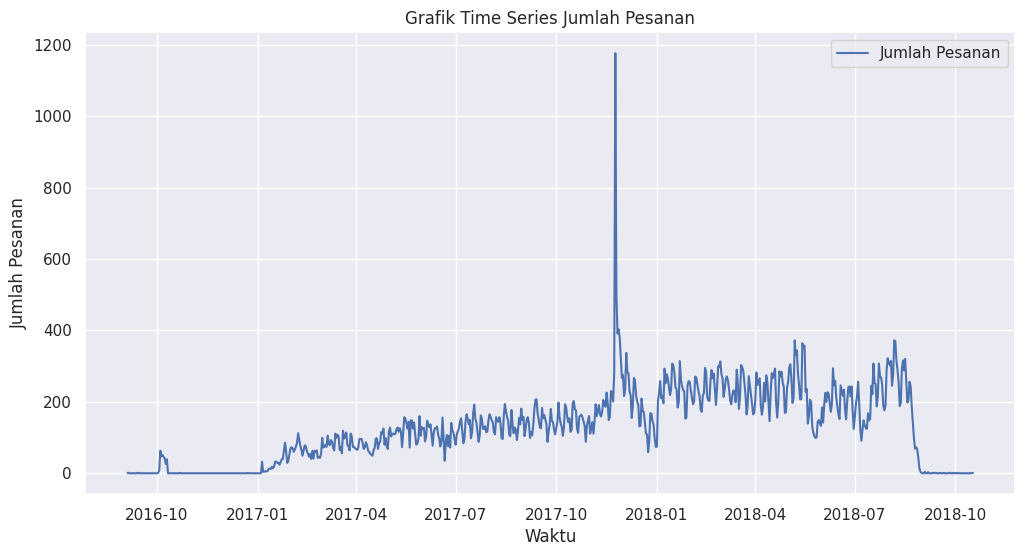

In [74]:
# Set indeks menjadi datetime
daily_orders_df.set_index('order_purchase_timestamp', inplace=True)

# Plot grafik jumlah pesanan
plt.figure(figsize=(12, 6))
sns.lineplot(data=daily_orders_df, x=daily_orders_df.index, y='order_count', label='Jumlah Pesanan')
plt.title('Grafik Time Series Jumlah Pesanan')
plt.xlabel('Waktu')
plt.ylabel('Jumlah Pesanan')
plt.grid(True)
plt.show()


Pertanyaan 2: Produk apa yang paling banyak dibeli dan kurang diminati oleh pelanggan?

In [44]:
# Mengelompokkan data berdasarkan nama produk dan menjumlahkan tiap order id
product_sales = all_df.groupby('product_category_name_english')['order_id'].count().sort_values(ascending=False)

# Mendapatkan produk dengan penjualan terbanyak
most_sold_product = product_sales.idxmax()
most_sold_count = product_sales.max()

# Mendapatkan produk dengan penjualan sedikit
least_sold_product = product_sales.idxmin()
least_sold_count = product_sales.min()

print(f"Produk dengan Penjualan Terbanyak adalah '{most_sold_product}' with {most_sold_count} orders.")
print(f"produk yang Kurang Diminati Pelanggan adalah '{least_sold_product}' with {least_sold_count} orders.")

Produk dengan Penjualan Terbanyak adalah 'bed_bath_table' with 11988 orders.
produk yang Kurang Diminati Pelanggan adalah 'security_and_services' with 2 orders.


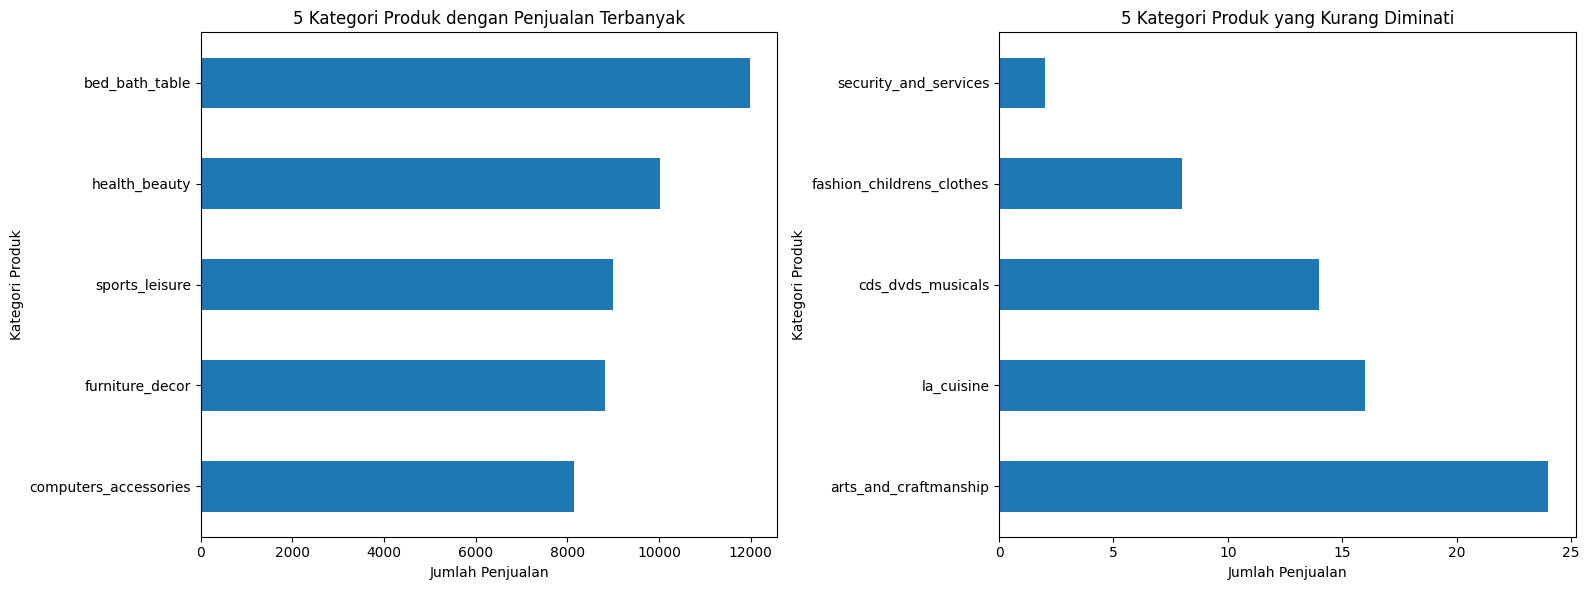

In [45]:
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(16, 6))

# 5 Kategori Produk dengan Penjualan Terbanyak
product_sales.head(5).sort_values(ascending=True).plot(kind='barh', ax=ax0)
ax0.set_title('5 Kategori Produk dengan Penjualan Terbanyak')
ax0.set_xlabel('Jumlah Penjualan')
ax0.set_ylabel('Kategori Produk')

# 5 Kategori Produk yang Kurang Diminati
product_sales.tail(5).sort_values(ascending=False).plot(kind='barh', ax=ax1)
ax1.set_title('5 Kategori Produk yang Kurang Diminati')
ax1.set_xlabel('Jumlah Penjualan')
ax1.set_ylabel('Kategori Produk')

plt.tight_layout()
plt.show()

Pertanyaan 3: Bagaimana Distribusi Pesanan yang Tercatat Berdasarkan Status Order?

In [46]:
# Distribusi Pesanan yang Tercatat Berdasarkan Status Orders
customer_order_status_groups = all_df.groupby('order_status')['customer_unique_id'].nunique()

# Menampilkan Hasil
customer_order_status_groups

,customer_unique_id
order_status,
approved,2
canceled,616
created,5
delivered,93358
invoiced,314
processing,301
shipped,1100
unavailable,604


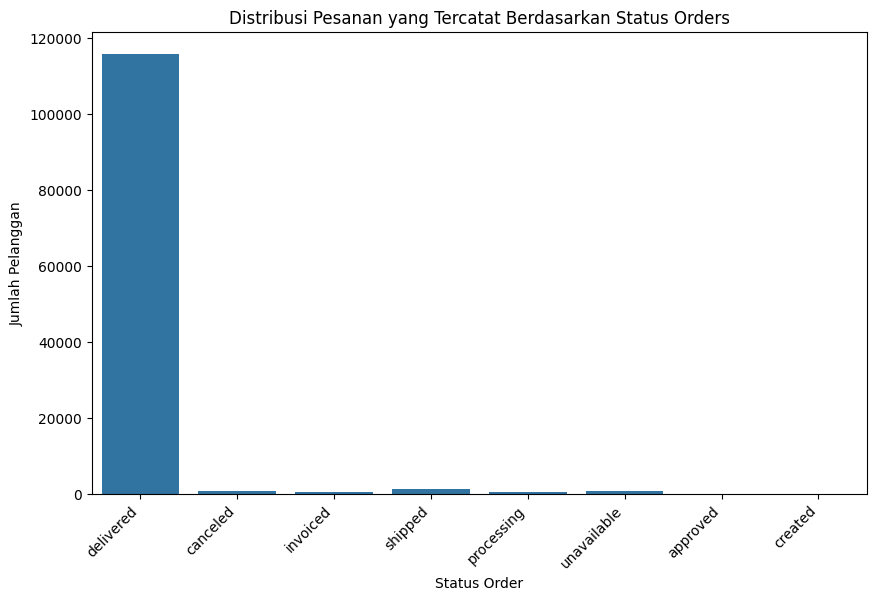

In [47]:
# Visualisasi Distribusi Pesanan yang Tercatat Berdasarkan Status Orders
plt.figure(figsize=(10, 6))
sns.countplot(x='order_status', data=all_df)
plt.title('Distribusi Pesanan yang Tercatat Berdasarkan Status Orders')
plt.xlabel('Status Order')
plt.ylabel('Jumlah Pelanggan')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

Pertanyaan 4 : Bagaimana Distribusi Pelanggan Berdasarkan Jenis Pembayaran?

In [48]:
# Mengelompokkan customer berdasarkan tipe pembayaran yang digunakan berdasarkan customer id yang unik
customer_payment_groups = all_df.groupby('payment_type')['customer_unique_id'].nunique()

# print hasil yang didapat
customer_payment_groups

,customer_unique_id
payment_type,
boleto,19290
credit_card,74092
debit_card,1513
not_defined,3
voucher,3760


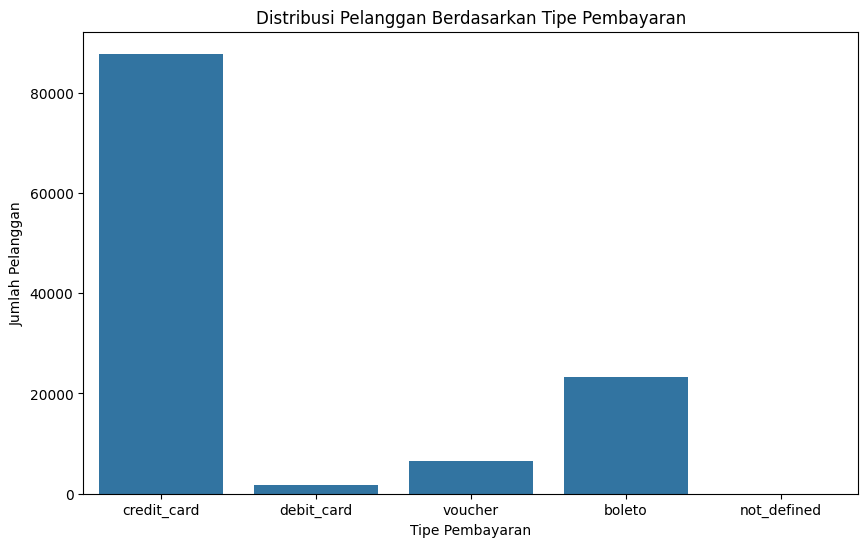

In [49]:
# Visualisasi Distribusi Pelanggan Berdasarkan Tipe Pembayaran
plt.figure(figsize=(10, 6))
sns.countplot(x='payment_type', data=all_df)
plt.title('Distribusi Pelanggan Berdasarkan Tipe Pembayaran')
plt.xlabel('Tipe Pembayaran')
plt.ylabel('Jumlah Pelanggan')
plt.show()

# Analisis Lanjutan (Opsional) dengan RFM Analysis

Analisis RFM (Recency, Frequency, Monetary) adalah sebuah metode yang digunakan untuk mengelompokkan pelanggan berdasarkan tiga variabel utama, yaitu:
* Recency: Kapan terakhir pelanggan melakukan transaksi.
* Frequency: Seberapa sering pelanggan melakukan transaksi.
* Monetary: Berapa banyak uang yang dikeluarkan pelanggan dalam setiap transaksi.

Tujuan utama dari analisis RFM adalah:
1. Dengan memahami pola pembelian pelanggan, perusahaan dapat mengidentifikasi pelanggan yang memberikan kontribusi terbesar terhadap pendapatan.
2. Pelanggan dapat dikelompokkan menjadi segmen-segmen yang berbeda berdasarkan perilaku pembeliannya. Hal ini memungkinkan perusahaan untuk menerapkan strategi pemasaran yang lebih tepat sasaran.
3. Analisis RFM dapat membantu dalam merancang program loyalitas yang lebih efektif dengan memberikan reward yang sesuai dengan nilai pelanggan.
4. Dengan memahami kebutuhan dan preferensi pelanggan, perusahaan dapat mengambil langkah-langkah untuk mempertahankan pelanggan yang sudah ada.
5. Analisis RFM dapat membantu dalam mengidentifikasi pelanggan yang paling mungkin merespons kampanye pemasaran tertentu.
6. Dengan menganalisis data historis, perusahaan dapat membuat prediksi tentang perilaku pelanggan di masa depan.

In [50]:
# RFM Analysis
rfm_df = all_df.groupby(by="customer_id", as_index=False).agg({
    "order_purchase_timestamp": "max", #mengambil tanggal order terakhir
    "order_id": "nunique",
    "price": "sum"
})
rfm_df.columns = ["customer_id", "max_order_timestamp", "frequency", "monetary"]
rfm_df

,customer_id,max_order_timestamp,frequency,monetary
0,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,1,89.80
1,000161a058600d5901f007fab4c27140,2017-07-16 09:40:32,1,54.90
2,0001fd6190edaaf884bcaf3d49edf079,2017-02-28 11:06:43,1,179.99
3,0002414f95344307404f0ace7a26f1d5,2017-08-16 13:09:20,1,149.90
4,000379cdec625522490c315e70c7a9fb,2018-04-02 13:42:17,1,93.00
...,...,...,...,...
99436,fffecc9f79fd8c764f843e9951b11341,2018-03-29 16:59:26,1,164.70
99437,fffeda5b6d849fbd39689bb92087f431,2018-05-22 13:36:02,1,47.90
99438,ffff42319e9b2d713724ae527742af25,2018-06-13 16:57:05,1,199.90
99439,ffffa3172527f765de70084a7e53aae8,2017-09-02 11:53:32,1,21.80


In [51]:
# Convert 'max_order_timestamp' to datetime
rfm_df["max_order_timestamp"] = pd.to_datetime(rfm_df["max_order_timestamp"])

# menghitung kapan terakhir pelanggan melakukan transaksi (hari)
rfm_df["max_order_timestamp"] = rfm_df["max_order_timestamp"].dt.date
recent_date = orders_df["order_purchase_timestamp"].dt.date.max()
rfm_df["recency"] = rfm_df["max_order_timestamp"].apply(lambda x: (recent_date - x).days)
rfm_df

,customer_id,max_order_timestamp,frequency,monetary,recency
0,00012a2ce6f8dcda20d059ce98491703,2017-11-14,1,89.80,337
1,000161a058600d5901f007fab4c27140,2017-07-16,1,54.90,458
2,0001fd6190edaaf884bcaf3d49edf079,2017-02-28,1,179.99,596
3,0002414f95344307404f0ace7a26f1d5,2017-08-16,1,149.90,427
4,000379cdec625522490c315e70c7a9fb,2018-04-02,1,93.00,198
...,...,...,...,...,...
99436,fffecc9f79fd8c764f843e9951b11341,2018-03-29,1,164.70,202
99437,fffeda5b6d849fbd39689bb92087f431,2018-05-22,1,47.90,148
99438,ffff42319e9b2d713724ae527742af25,2018-06-13,1,199.90,126
99439,ffffa3172527f765de70084a7e53aae8,2017-09-02,1,21.80,410


In [52]:
rfm_df.drop("max_order_timestamp", axis=1, inplace=True)
rfm_df

,customer_id,frequency,monetary,recency
0,00012a2ce6f8dcda20d059ce98491703,1,89.80,337
1,000161a058600d5901f007fab4c27140,1,54.90,458
2,0001fd6190edaaf884bcaf3d49edf079,1,179.99,596
3,0002414f95344307404f0ace7a26f1d5,1,149.90,427
4,000379cdec625522490c315e70c7a9fb,1,93.00,198
...,...,...,...,...
99436,fffecc9f79fd8c764f843e9951b11341,1,164.70,202
99437,fffeda5b6d849fbd39689bb92087f431,1,47.90,148
99438,ffff42319e9b2d713724ae527742af25,1,199.90,126
99439,ffffa3172527f765de70084a7e53aae8,1,21.80,410


In [53]:
rfm_df.describe()

,frequency,monetary,recency
count,99441.0,99441.000000,99441.000000
mean,1.0,143.539382,290.272956
std,0.0,241.433332,153.670615
min,1.0,0.000000,0.000000
25%,1.0,45.950000,166.000000
50%,1.0,89.000000,272.000000
75%,1.0,153.800000,400.000000
max,1.0,13440.000000,773.000000


In [54]:
rfm_df.sort_values(by="recency", ascending=True).head(5)

,customer_id,frequency,monetary,recency
63970,a4b417188addbc05b26b72d5e44837a1,1,0.0,0
51713,856336203359aa6a61bf3826f7d84c49,1,0.0,1
29531,4c2ec60c29d10c34bd49cb88aa85cfc4,1,0.0,14
74611,bf6181a85bbb4115736c0a8db1a53be3,1,0.0,16
15595,2823ffda607a2316375088e0d00005ec,1,0.0,18


In [55]:
rfm_df.sort_values(by="recency", ascending=False).head(5)

,customer_id,frequency,monetary,recency
3354,08c5351a6aca1c1589a38f244edeee9d,1,72.89,773
40289,683c54fc24d40ee9f8a6fc179fd9856c,1,59.50,772
38013,622e13439d6b5a0b486c435618b2679e,1,0.00,764
52277,86dc2ffce2dfff336de2f386a786e574,1,134.97,762
68946,b106b360fe2ef8849fbbd056f777b4d5,1,100.00,745


In [56]:
rfm_df.sort_values(by="frequency", ascending=True).head(5)

,customer_id,frequency,monetary,recency
0,00012a2ce6f8dcda20d059ce98491703,1,89.80,337
66299,aa72002446dfbac0691304465c1b982d,1,9.99,612
66298,aa71b21388b99444414a772acde9f6aa,1,110.00,394
66297,aa6ee75a5950e07fa3f543bf48ee608e,1,185.90,163
66296,aa6edca5d83d4c8e9a2262b9847febd6,1,54.90,77


In [57]:
rfm_df.sort_values(by="frequency", ascending=False).head(5)

,customer_id,frequency,monetary,recency
0,00012a2ce6f8dcda20d059ce98491703,1,89.80,337
66279,aa62a16b10e3fb24ecdefd7e4dc3fa65,1,139.00,115
66301,aa738cdb72af39e38482fa25b992c67c,1,53.90,222
66300,aa7210736aad65a84e964cfa8d64aa66,1,259.80,202
66299,aa72002446dfbac0691304465c1b982d,1,9.99,612


In [58]:
rfm_df.sort_values(by="monetary", ascending=True).head(5)

,customer_id,frequency,monetary,recency
99440,ffffe8b65bbe3087b653a978c870db99,1,0.0,383
51451,84b37eb4e166599b6d40f6a4376589de,1,0.0,530
51422,849bdfd6f3313ffa83d9b0b2981331cb,1,0.0,616
86839,df20748206e4b865b2f14a5eabbfcf34,1,0.0,274
86887,df45454de710054424258d3bc3f2ff63,1,0.0,331


In [59]:
rfm_df.sort_values(by="monetary", ascending=False).head(5)

,customer_id,frequency,monetary,recency
8546,1617b1357756262bfa56ab541c47bc16,1,13440.00,383
60184,9af2372a1e49340278e7c1ef8d749f34,1,11383.95,545
86603,de832e8dbb1f588a47013e53feaa67cc,1,10856.10,506
38590,63b964e79dee32a3587651701a2b8dbf,1,9888.00,245
43009,6f241d5bbb142b6f764387c8c270645a,1,9520.14,160


<ipython-input-60-ce3b4d499f63>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="recency", x="customer_id", data=rfm_df.sort_values(by="recency", ascending=True).head(5), palette=colors, ax=ax[0])
<ipython-input-60-ce3b4d499f63>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="frequency", x="customer_id", data=rfm_df.sort_values(by="frequency", ascending=False).head(5), palette=colors, ax=ax[1])
<ipython-input-60-ce3b4d499f63>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="monetary", x="customer_id", data=rfm_df.sort_values(by="

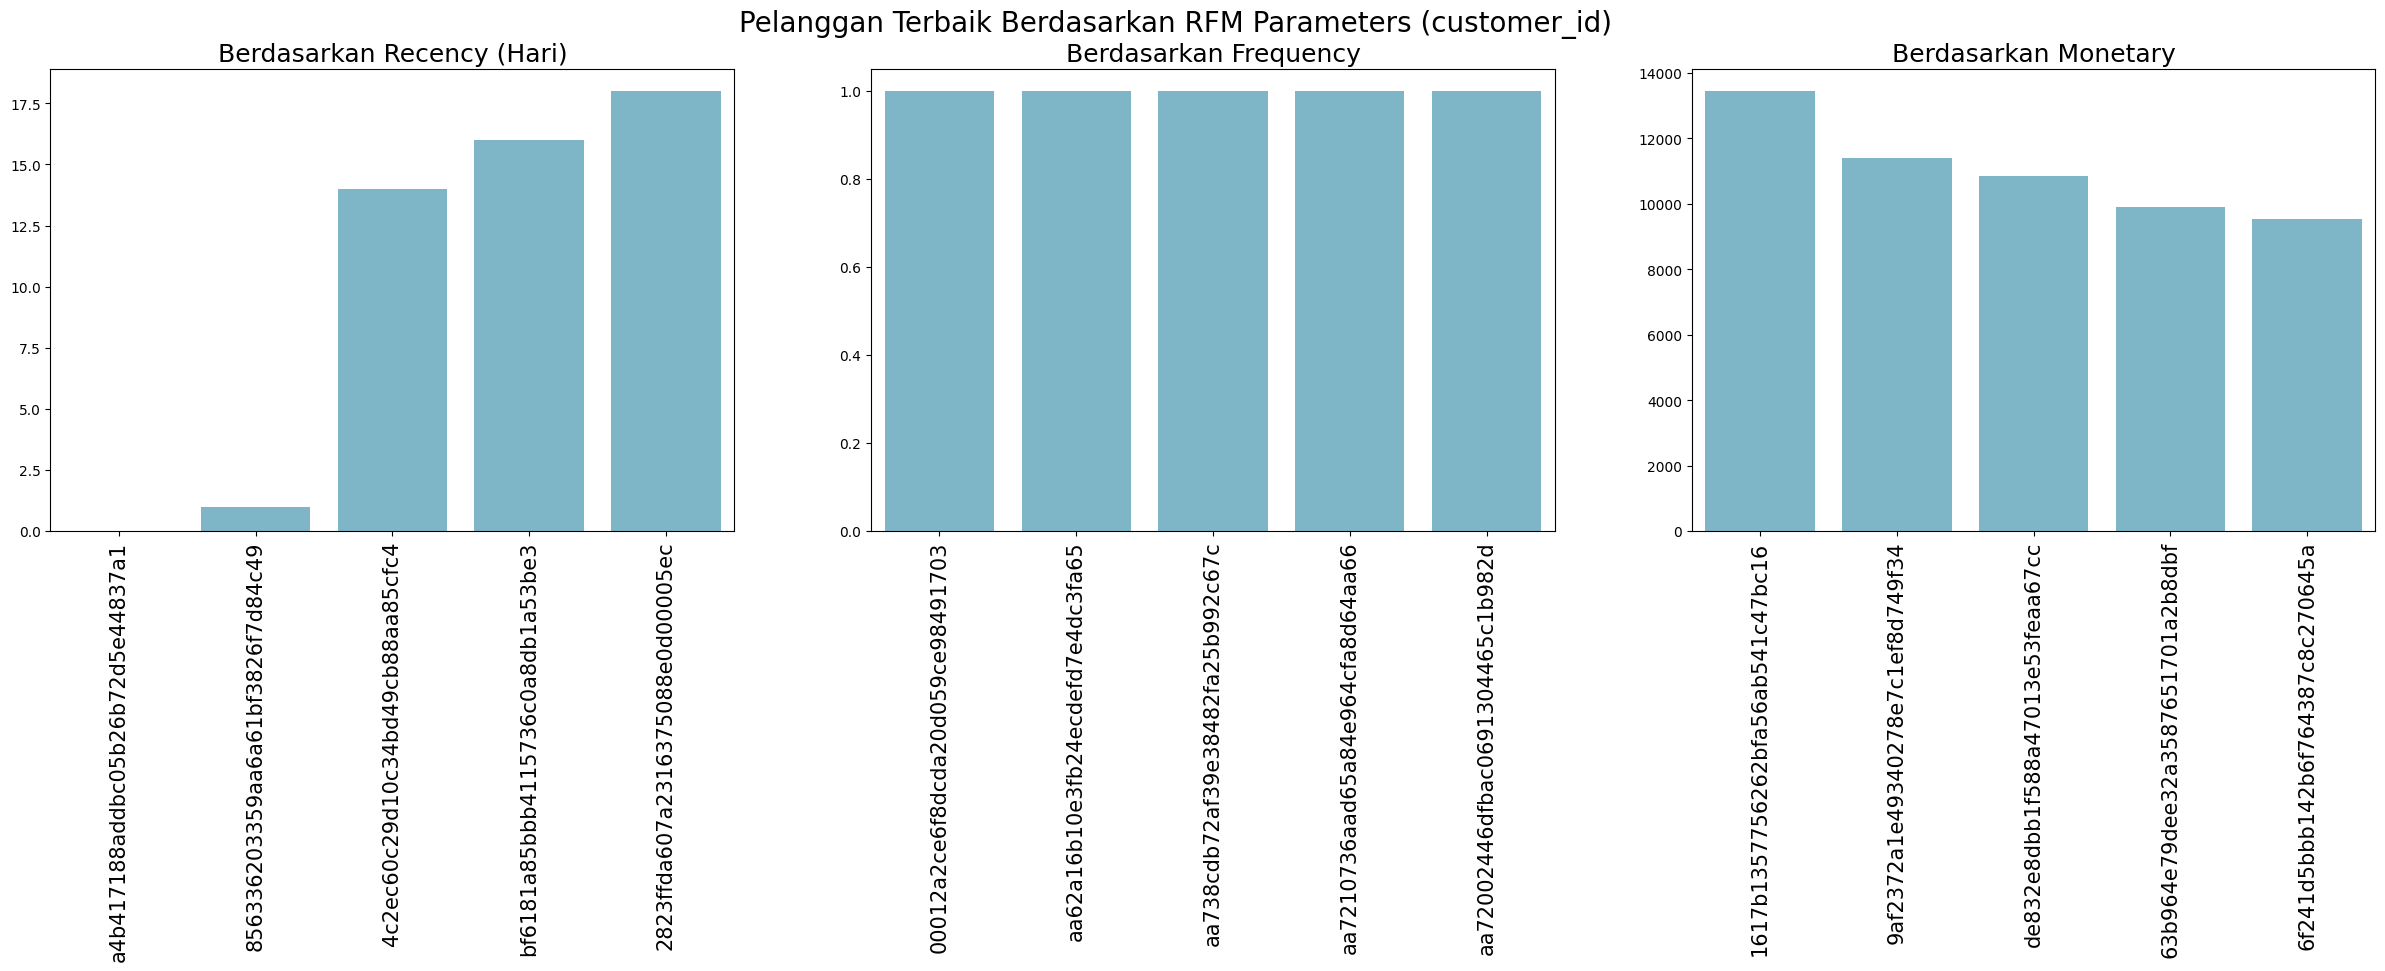

In [60]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 6))

colors = ["#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4"]

sns.barplot(y="recency", x="customer_id", data=rfm_df.sort_values(by="recency", ascending=True).head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Berdasarkan Recency (Hari)", loc="center", fontsize=18)
ax[0].tick_params(axis ='x', labelsize=15, rotation=90)

sns.barplot(y="frequency", x="customer_id", data=rfm_df.sort_values(by="frequency", ascending=False).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title("Berdasarkan Frequency", loc="center", fontsize=18)
ax[1].tick_params(axis='x', labelsize=15, rotation=90)

sns.barplot(y="monetary", x="customer_id", data=rfm_df.sort_values(by="monetary", ascending=False).head(5), palette=colors, ax=ax[2])
ax[2].set_ylabel(None)
ax[2].set_xlabel(None)
ax[2].set_title("Berdasarkan Monetary", loc="center", fontsize=18)
ax[2].tick_params(axis='x', labelsize=15, rotation=90)

plt.suptitle("Pelanggan Terbaik Berdasarkan RFM Parameters (customer_id)", fontsize=20)
plt.show()

In [61]:
rfm_df['r_rank'] = rfm_df['recency'].rank(ascending=False)
rfm_df['f_rank'] = rfm_df['frequency'].rank(ascending=True)
rfm_df['m_rank'] = rfm_df['monetary'].rank(ascending=True)

rfm_df

,customer_id,frequency,monetary,recency,r_rank,f_rank,m_rank
0,00012a2ce6f8dcda20d059ce98491703,1,89.80,337,34364.5,49721.0,50182.5
1,000161a058600d5901f007fab4c27140,1,54.90,458,16871.5,49721.0,31252.5
2,0001fd6190edaaf884bcaf3d49edf079,1,179.99,596,2882.0,49721.0,79937.0
3,0002414f95344307404f0ace7a26f1d5,1,149.90,427,21181.5,49721.0,73341.0
4,000379cdec625522490c315e70c7a9fb,1,93.00,198,66986.5,49721.0,52578.5
...,...,...,...,...,...,...,...
99436,fffecc9f79fd8c764f843e9951b11341,1,164.70,202,66208.5,49721.0,76586.0
99437,fffeda5b6d849fbd39689bb92087f431,1,47.90,148,79237.0,49721.0,25554.0
99438,ffff42319e9b2d713724ae527742af25,1,199.90,126,83076.0,49721.0,82981.5
99439,ffffa3172527f765de70084a7e53aae8,1,21.80,410,23507.5,49721.0,7476.0


In [62]:
# normalizing the rank of the customers
rfm_df['r_rank_norm'] = (rfm_df['r_rank']/rfm_df['r_rank'].max())*100
rfm_df['f_rank_norm'] = (rfm_df['f_rank']/rfm_df['f_rank'].max())*100
rfm_df['m_rank_norm'] = (rfm_df['m_rank']/rfm_df['m_rank'].max())*100

rfm_df.drop(columns=['r_rank', 'f_rank', 'm_rank'], inplace=True)

rfm_df

,customer_id,frequency,monetary,recency,r_rank_norm,f_rank_norm,m_rank_norm
0,00012a2ce6f8dcda20d059ce98491703,1,89.80,337,34.557677,100.0,50.464597
1,000161a058600d5901f007fab4c27140,1,54.90,458,16.966342,100.0,31.428184
2,0001fd6190edaaf884bcaf3d49edf079,1,179.99,596,2.898201,100.0,80.386360
3,0002414f95344307404f0ace7a26f1d5,1,149.90,427,21.300570,100.0,73.753281
4,000379cdec625522490c315e70c7a9fb,1,93.00,198,67.363060,100.0,52.874066
...,...,...,...,...,...,...,...
99436,fffecc9f79fd8c764f843e9951b11341,1,164.70,202,66.580686,100.0,77.016522
99437,fffeda5b6d849fbd39689bb92087f431,1,47.90,148,79.682425,100.0,25.697650
99438,ffff42319e9b2d713724ae527742af25,1,199.90,126,83.543005,100.0,83.447974
99439,ffffa3172527f765de70084a7e53aae8,1,21.80,410,23.639646,100.0,7.518026


In [63]:
rfm_df['RFM_score'] = 0.15*rfm_df['r_rank_norm']+0.28 * \
    rfm_df['f_rank_norm']+0.57*rfm_df['m_rank_norm']
rfm_df['RFM_score'] *= 0.05
rfm_df = rfm_df.round(2)
rfm_df[['customer_id', 'RFM_score']]

,customer_id,RFM_score
0,00012a2ce6f8dcda20d059ce98491703,3.10
1,000161a058600d5901f007fab4c27140,2.42
2,0001fd6190edaaf884bcaf3d49edf079,3.71
3,0002414f95344307404f0ace7a26f1d5,3.66
4,000379cdec625522490c315e70c7a9fb,3.41
...,...,...
99436,fffecc9f79fd8c764f843e9951b11341,4.09
99437,fffeda5b6d849fbd39689bb92087f431,2.73
99438,ffff42319e9b2d713724ae527742af25,4.40
99439,ffffa3172527f765de70084a7e53aae8,1.79


In [64]:
rfm_df["customer_segment"] = np.where(
    rfm_df['RFM_score'] > 4.5, "Top customers", (np.where(
        rfm_df['RFM_score'] > 4, "High value customer",(np.where(
            rfm_df['RFM_score'] > 3, "Medium value customer", np.where(
                rfm_df['RFM_score'] > 1.6, 'Low value customers', 'lost customers'))))))

rfm_df[['customer_id', 'RFM_score', 'customer_segment']]

,customer_id,RFM_score,customer_segment
0,00012a2ce6f8dcda20d059ce98491703,3.10,Medium value customer
1,000161a058600d5901f007fab4c27140,2.42,Low value customers
2,0001fd6190edaaf884bcaf3d49edf079,3.71,Medium value customer
3,0002414f95344307404f0ace7a26f1d5,3.66,Medium value customer
4,000379cdec625522490c315e70c7a9fb,3.41,Medium value customer
...,...,...,...
99436,fffecc9f79fd8c764f843e9951b11341,4.09,High value customer
99437,fffeda5b6d849fbd39689bb92087f431,2.73,Low value customers
99438,ffff42319e9b2d713724ae527742af25,4.40,High value customer
99439,ffffa3172527f765de70084a7e53aae8,1.79,Low value customers


In [65]:
customer_segment_df = rfm_df.groupby(by="customer_segment", as_index=False).customer_id.nunique()
customer_segment_df

,customer_segment,customer_id
0,High value customer,16207
1,Low value customers,41634
2,Medium value customer,34900
3,Top customers,5489
4,lost customers,1211


<ipython-input-66-103b127f8bb6>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


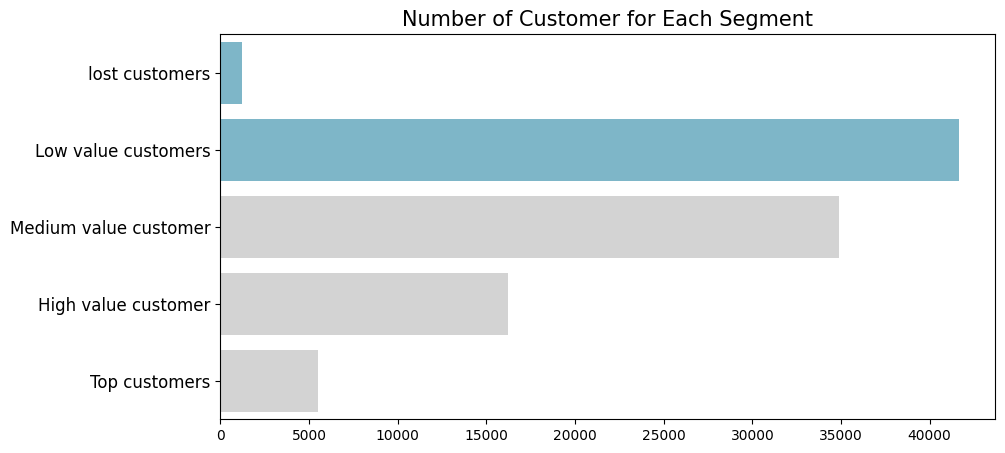

In [66]:
customer_segment_df['customer_segment'] = pd.Categorical(customer_segment_df['customer_segment'], [
    "lost customers", "Low value customers", "Medium value customer", "High value customer", "Top customers"])

plt.figure(figsize=(10, 5))
colors_ = ["#72BCD4", "#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(
    x="customer_id", y="customer_segment",
    data=customer_segment_df.sort_values(by="customer_segment", ascending=False),
    palette=colors_)

plt.title("Number of Customer for Each Segment", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='y', labelsize=12)
plt.show()


# Conclusion

* Conclusion Jawaban Pertanyaan 1 = Puncak penjualan terjadi pada periode Oktober 2017 hingga Januari 2018, dengan total pendapatan mendekati angka 160.000.

* Conclusion Jawaban pertanyaan 2 = Kategori produk rumah tangga (bed_bath_table) menjadi primadona dengan 11.988 pesanan, sementara produk keamanan dan pelayanan (security_and_services) kurang diminati pelanggan dengan hanya 2 pesanan.

* Conclusion Jawaban pertanyaan 3 = Sebagian besar pesanan telah berhasil dikirim (delivered) dengan jumlah 93358 pesanan. Sebanyak 1.100 order berstatus shipped, 616 order dibatalkan, dan 604 order berstatus unavailable. Ada juga 314 order yang sudah invoiced, 301 order dalam proses processing, 5 order baru created, dan 2 order telah approved.

* Conclusion Jawaban pertanyaan 4 = Jenis pembayaran yang paling populer adalah kartu kredit dengan 74.092 transaksi, diikuti oleh boleto dengan 19.290 transaksi. Metode voucher digunakan dalam 3.760 transaksi, sementara kartu debit digunakan dalam 1.513 transaksi.

* Conclusion analisis RFM:
1. Sebagian besar pelanggan termasuk dalam kategori "Low Value Customers". Ini mengindikasikan bahwa perusahaan perlu fokus pada strategi untuk meningkatkan nilai transaksi dari segmen ini.
2. Jumlah pelanggan yang "Lost Customers" relatif kecil dibandingkan dengan segmen lainnya. Ini bisa menjadi sinyal positif, namun tetap perlu dilakukan upaya untuk mempertahankan pelanggan yang ada.
3. Segmen "High Value Customers" dan "Top Customers" memiliki potensi pertumbuhan yang signifikan. Perusahaan dapat melakukan upaya lebih lanjut untuk mempertahankan dan meningkatkan engagement pelanggan di segmen ini.


In [67]:
pip freeze requirements.txt

absl-py==1.4.0
accelerate==0.34.2
aiohappyeyeballs==2.4.3
aiohttp==3.10.10
aiosignal==1.3.1
alabaster==0.7.16
albucore==0.0.16
albumentations==1.4.15
altair==4.2.2
annotated-types==0.7.0
anyio==3.7.1
argon2-cffi==23.1.0
argon2-cffi-bindings==21.2.0
array_record==0.5.1
arviz==0.19.0
astropy==6.1.4
astropy-iers-data==0.2024.10.7.0.32.46
astunparse==1.6.3
async-timeout==4.0.3
atpublic==4.1.0
attrs==24.2.0
audioread==3.0.1
autograd==1.7.0
babel==2.16.0
backcall==0.2.0
beautifulsoup4==4.12.3
bigframes==1.22.0
bigquery-magics==0.4.0
bleach==6.1.0
blinker==1.4
blis==0.7.11
blosc2==2.0.0
bokeh==3.4.3
Bottleneck==1.4.0
bqplot==0.12.43
branca==0.8.0
build==1.2.2.post1
CacheControl==0.14.0
cachetools==5.5.0
catalogue==2.0.10
certifi==2024.8.30
cffi==1.17.1
chardet==5.2.0
charset-normalizer==3.4.0
chex==0.1.87
clarabel==0.9.0
click==8.1.7
cloudpathlib==0.19.0
cloudpickle==2.2.1
cmake==3.30.4
cmdstanpy==1.2.4
colorcet==3.1.0
colorlover==0.3.0
colour==0.1.5
community==1.0.0b1
confection==0.1.5
cons=

In [68]:
pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.9/41.9 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 75.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 13.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 73.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.3/79.3 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 4.2 MB/s eta 0:00:00


2024-10-17 09:50:27.898 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-17 09:50:28.108 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-17 09:50:28.180 
  command:

    streamlit run /usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2024-10-17 09:50:28.182 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-17 09:50:28.186 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-17 09:50:28.190 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-17 09:50:28.192 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when runn

DeltaGenerator()

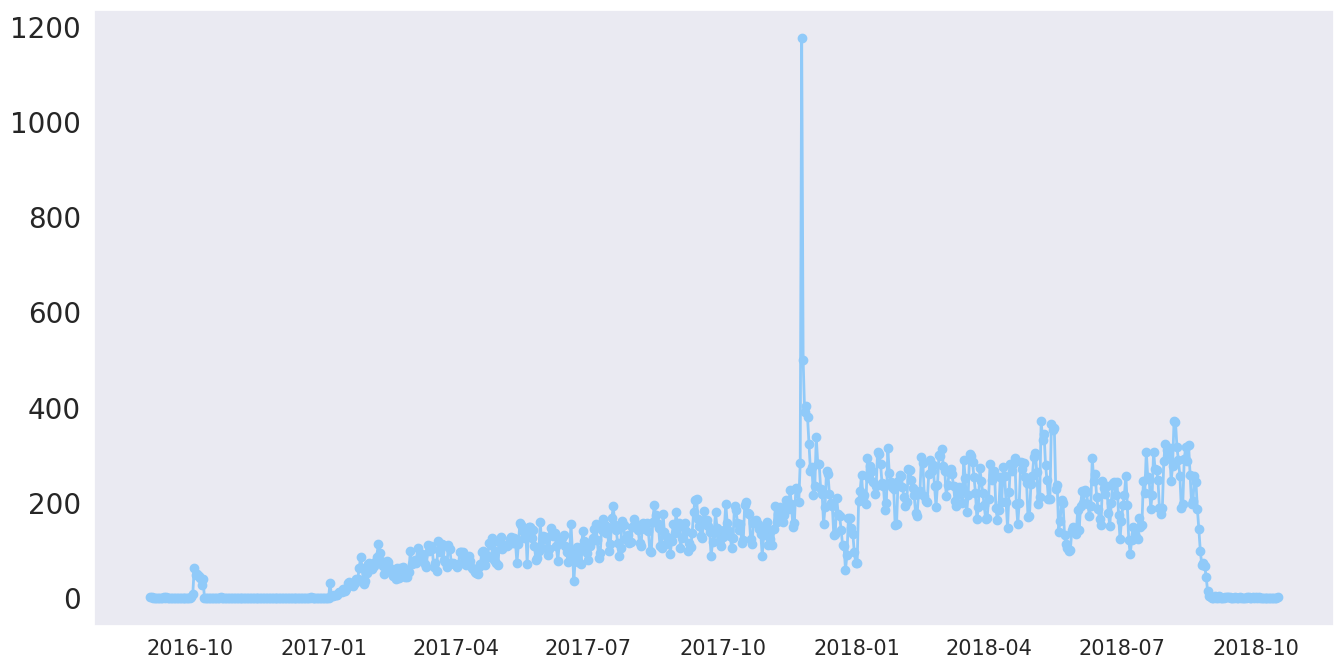

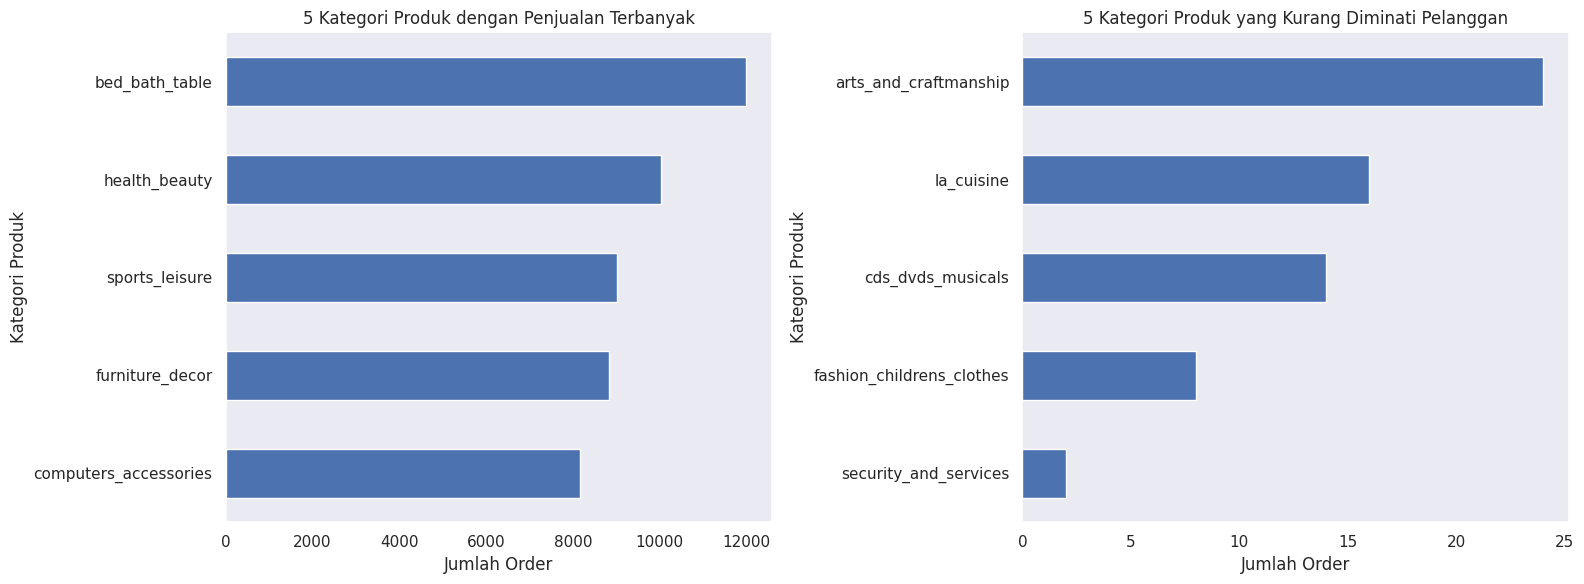

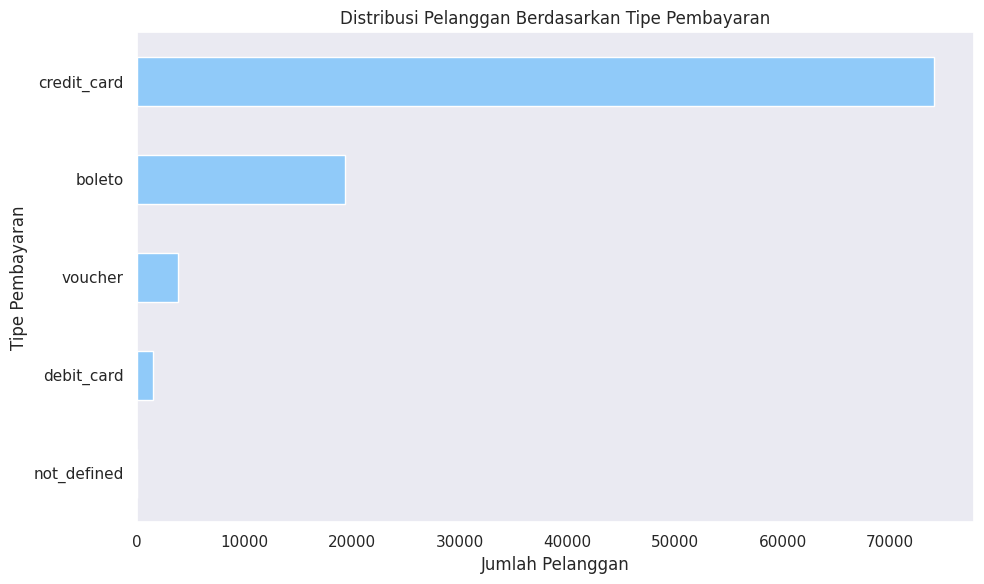

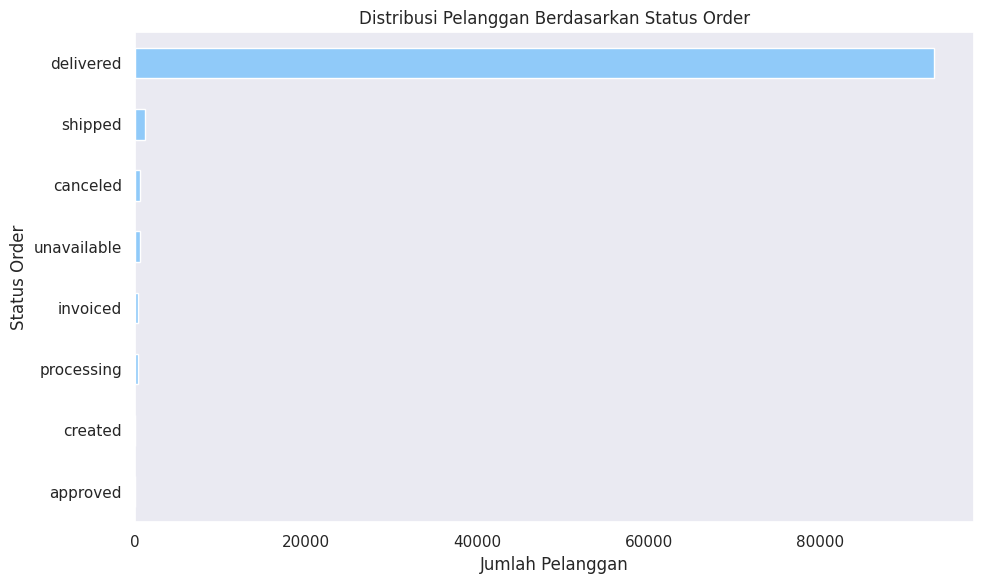

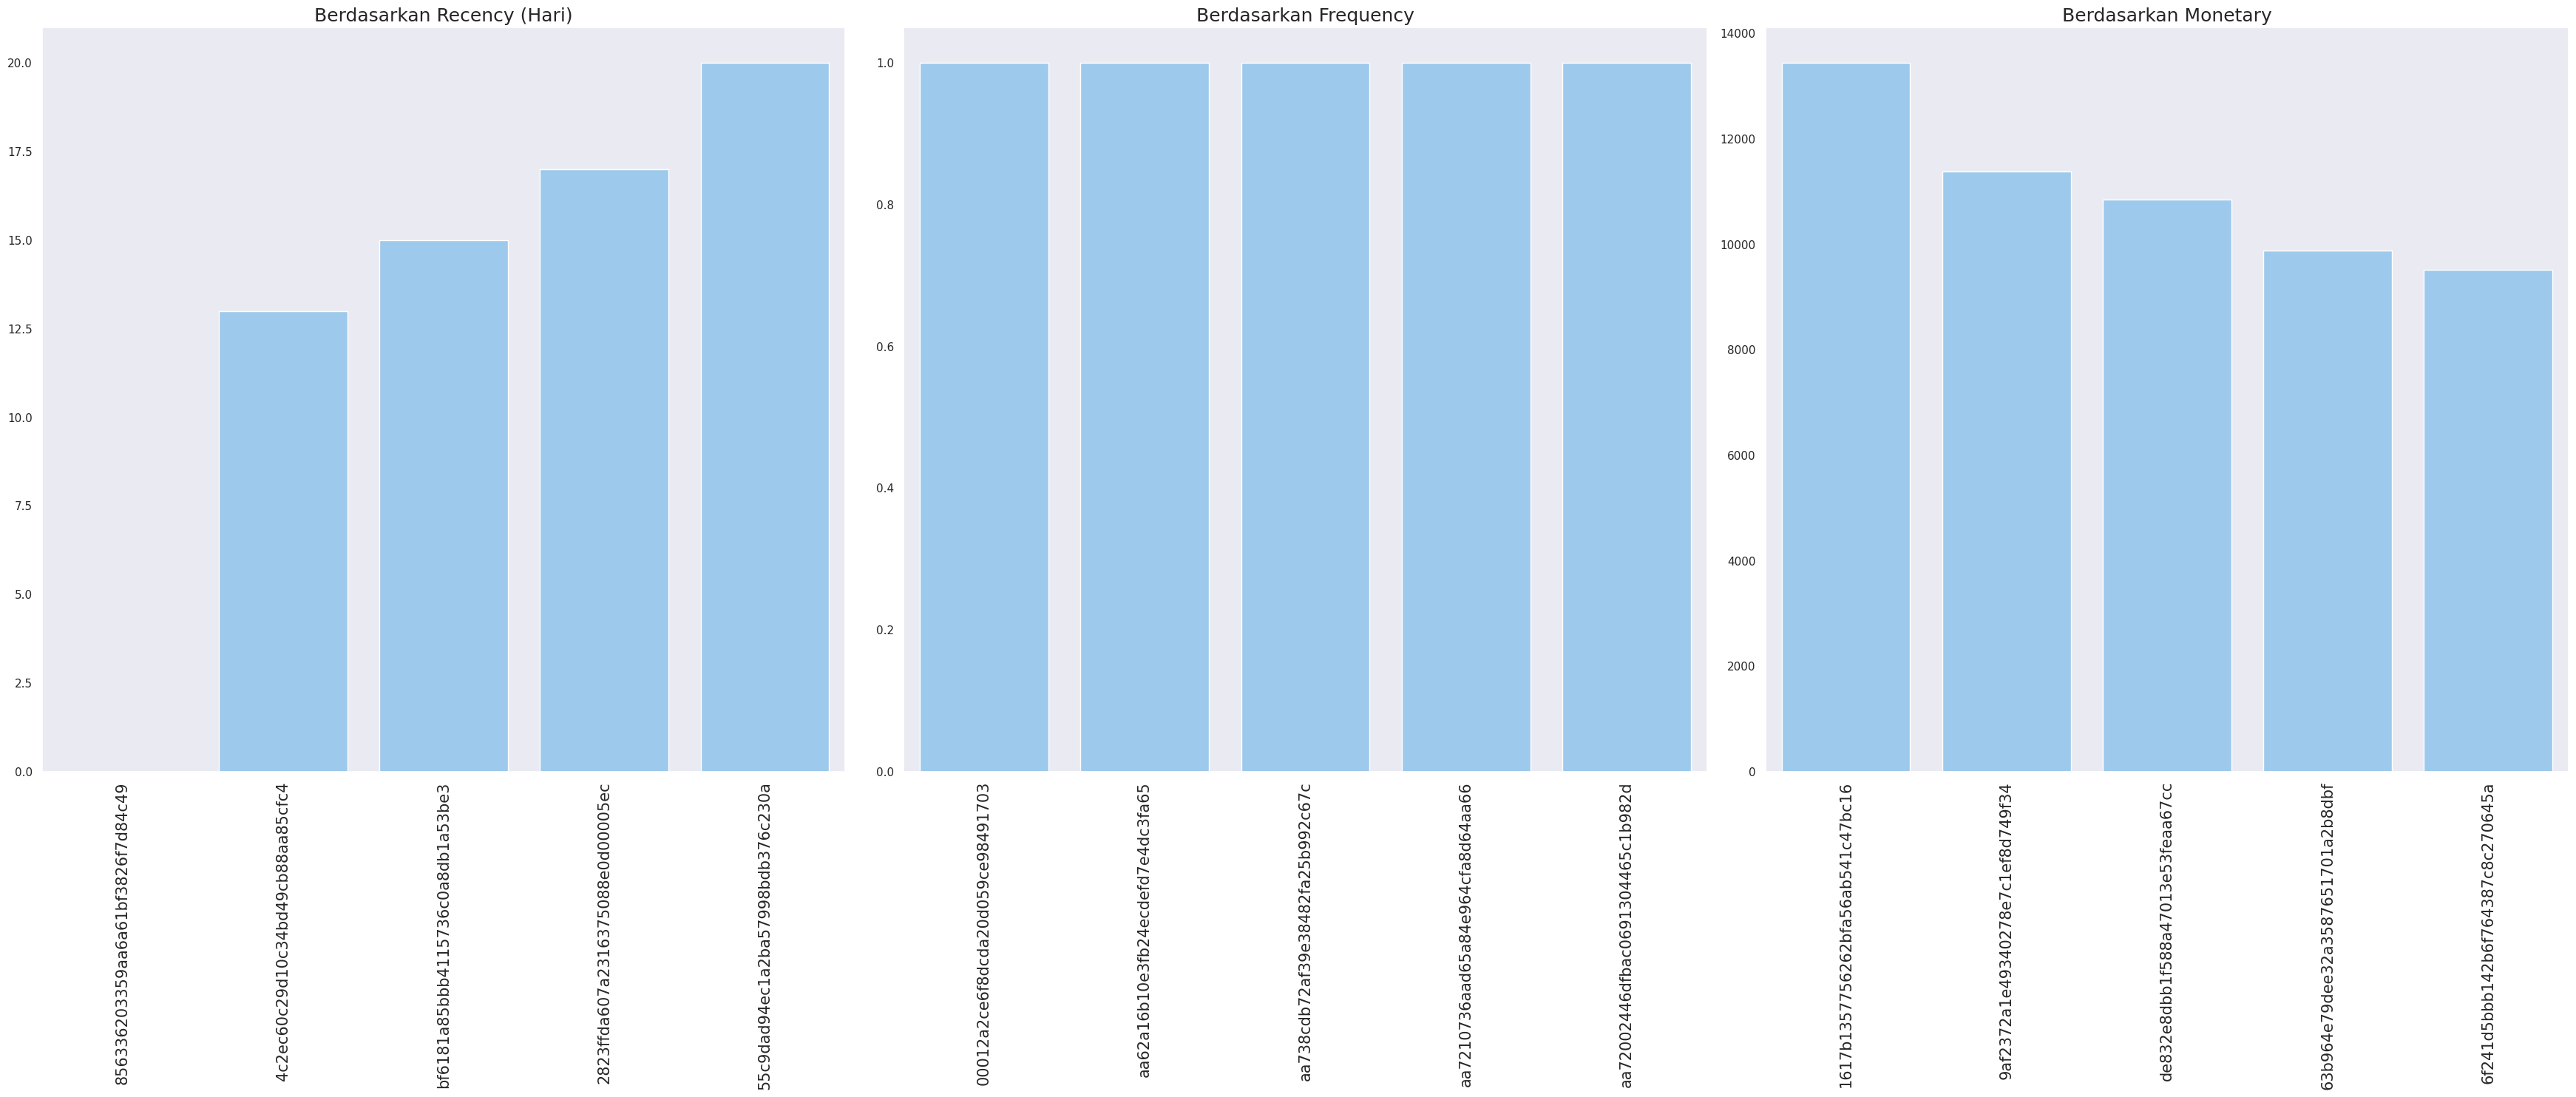

In [70]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st
from babel.numbers import format_currency
import time
from datetime import datetime

# Set the style for seaborn
sns.set(style='dark')

# Function Definitions
def create_daily_orders_df(df):
    daily_orders_df = df.resample(rule='D', on='order_purchase_timestamp').agg({
        "order_id": "nunique",
        "price": "sum"
    })
    daily_orders_df = daily_orders_df.reset_index()
    daily_orders_df.rename(columns={
        "order_id": "order_count",
        "price": "revenue"
    }, inplace=True)
    return daily_orders_df

def create_sum_order_items_df(df):
    sum_order_items_df = df.groupby("product_category_name_english")['order_item_id'].sum().sort_values(ascending=False).reset_index()
    return sum_order_items_df

def create_bystate_df(df):
    bystate_df = df.groupby(by="customer_state").customer_id.nunique().reset_index()
    bystate_df.rename(columns={"customer_id": "customer_count"}, inplace=True)
    return bystate_df

def plot_product_sales(product_sales):
    fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(16, 6))
    product_sales.head(5).sort_values(ascending=True).plot(kind='barh', ax=ax0)
    ax0.set_title('5 Kategori Produk dengan Penjualan Terbanyak')
    ax0.set_xlabel('Jumlah Order')
    ax0.set_ylabel('Kategori Produk')
    product_sales.tail(5).sort_values(ascending=True).plot(kind='barh', ax=ax1)
    ax1.set_title('5 Kategori Produk yang Kurang Diminati Pelanggan')
    ax1.set_xlabel('Jumlah Order')
    ax1.set_ylabel('Kategori Produk')
    plt.tight_layout()
    return fig

def plot_payment_types(customer_payment_groups):
    fig, ax = plt.subplots(figsize=(10, 6))
    customer_payment_groups.sort_values().plot(kind='barh', ax=ax, color="#90CAF9")
    ax.set_title('Distribusi Pelanggan Berdasarkan Tipe Pembayaran')
    ax.set_xlabel('Jumlah Pelanggan')
    ax.set_ylabel('Tipe Pembayaran')
    plt.tight_layout()
    return fig

def plot_order_status(customer_order_status_groups):
    fig, ax = plt.subplots(figsize=(10, 6))
    customer_order_status_groups.sort_values().plot(kind='barh', ax=ax, color="#90CAF9")
    ax.set_title('Distribusi Pelanggan Berdasarkan Status Order')
    ax.set_xlabel('Jumlah Pelanggan')
    ax.set_ylabel('Status Order')
    plt.tight_layout()
    return fig

def create_rfm_df(df):
    rfm_df = df.groupby(by="customer_id", as_index=False).agg({
        "order_purchase_timestamp": "max",
        "order_id": "nunique",
        "price": "sum"
    })
    rfm_df.columns = ["customer_id", "max_order_timestamp", "frequency", "monetary"]
    rfm_df["max_order_timestamp"] = rfm_df["max_order_timestamp"].dt.date
    recent_date = df["order_purchase_timestamp"].dt.date.max()
    rfm_df["recency"] = rfm_df["max_order_timestamp"].apply(lambda x: (recent_date - x).days)
    rfm_df.drop("max_order_timestamp", axis=1, inplace=True)
    return rfm_df

# Load Data
all_df = pd.read_csv("all_data.csv")

# Convert datetime columns
datetime_columns = ["order_purchase_timestamp", "order_delivered_carrier_date"]
for column in datetime_columns:
    all_df[column] = pd.to_datetime(all_df[column])

min_date = all_df["order_purchase_timestamp"].min()
max_date = all_df["order_purchase_timestamp"].max()

# Streamlit Sidebar
with st.sidebar:
    st.image("logo.jpg", width=100)
    start_date, end_date = st.date_input(
        label='Rentang Waktu', min_value=min_date,
        max_value=max_date,
        value=[min_date, max_date]
    )

# Filter main DataFrame
main_df = all_df[(all_df["order_purchase_timestamp"] >= str(start_date)) &
                  (all_df["order_purchase_timestamp"] <= str(end_date))]

# Data Analysis
daily_orders_df = create_daily_orders_df(main_df)
rfm_df = create_rfm_df(main_df)

# Product Sales Analysis
product_sales = main_df.groupby('product_category_name_english')['order_id'].count().sort_values(ascending=False)
most_sold_product = product_sales.idxmax()
most_sold_count = product_sales.max()
least_sold_product = product_sales.idxmin()
least_sold_count = product_sales.min()

# Dashboard Structure
st.header('Analisis Data E-Commerce')

# Daily Orders Purchased
st.subheader('Order Harian yang Dibeli')
col1, col2 = st.columns(2)
with col1:
    total_orders = daily_orders_df.order_count.sum()
    st.metric("Total Orders", value=total_orders)
with col2:
    total_revenue = format_currency(daily_orders_df.revenue.sum(), "AUD", locale='es_CO')
    st.metric("Total Revenue", value=total_revenue)

fig, ax = plt.subplots(figsize=(16, 8))
ax.plot(daily_orders_df["order_purchase_timestamp"], daily_orders_df["order_count"], marker='o', linewidth=2, color="#90CAF9")
ax.tick_params(axis='y', labelsize=20)
ax.tick_params(axis='x', labelsize=15)
st.pyplot(fig)

# Analisis Penjualan Produk
st.subheader('Analisis Penjualan Produk')
product_sales_fig = plot_product_sales(product_sales)
st.pyplot(product_sales_fig)

# Analisis Pembayaran Pelanggan
st.subheader('Analisis Pembayaran Pelanggan')
customer_payment_groups = main_df.groupby('payment_type')['customer_unique_id'].nunique()
st.pyplot(plot_payment_types(customer_payment_groups))

# Analisis Status Order Pelanggan
st.subheader('Analisis Status Order Pelanggan')
customer_order_status_groups = main_df.groupby('order_status')['customer_unique_id'].nunique()
st.pyplot(plot_order_status(customer_order_status_groups))

# Pelanggan Terbaik Berdasarakn RFM Parameters
st.subheader("Pelanggan Terbaik Berdasarkan RFM Parameters")
col1, col2, col3 = st.columns(3)
with col1:
    avg_recency = round(rfm_df.recency.mean(), 1)
    st.metric("Average Recency (days)", value=avg_recency)
with col2:
    avg_frequency = round(rfm_df.frequency.mean(), 2)
    st.metric("Average Frequency", value=avg_frequency)
with col3:
    avg_monetary = format_currency(rfm_df.monetary.mean(), "AUD", locale='es_CO')
    st.metric("Average Monetary", value=avg_monetary)

# RFM Analysis Plot
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(35, 15))
colors = ["#90CAF9", "#90CAF9", "#90CAF9", "#90CAF9", "#90CAF9"]

sns.barplot(y="recency", x="customer_id", data=rfm_df.sort_values(by="recency", ascending=True).head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Berdasarkan Recency (Hari)", loc="center", fontsize=18)
ax[0].tick_params(axis='x', labelsize=15, rotation=90)

sns.barplot(y="frequency", x="customer_id", data=rfm_df.sort_values(by="frequency", ascending=False).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title("Berdasarkan Frequency", loc="center", fontsize=18)
ax[1].tick_params(axis='x', labelsize=15, rotation=90)

sns.barplot(y="monetary", x="customer_id", data=rfm_df.sort_values(by="monetary", ascending=False).head(5), palette=colors, ax=ax[2])
ax[2].set_ylabel(None)
ax[2].set_xlabel(None)
ax[2].set_title("Berdasarkan Monetary", loc="center", fontsize=18)
ax[2].tick_params(axis='x', labelsize=15, rotation=90)

plt.tight_layout()
st.pyplot(fig)